# Tensorflow Basics

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. It was developed by the Google Brain team for Google's internal use in research and production.

## Setting up tensorflow and importing libraries

Install tensorflow by the command: **`!pip install tensorflow`**.

In [1]:
# Install tensorflow
# !pip install tensorflow

In [2]:
# Import tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Tensors

TensorFlow operates on multidimensional arrays or _tensors_ represented as **`tf.Tensor`** objects. The most important attributes of a **`tf.Tensor`** are its `shape` and `dtype`:
- **`Tensor.shape`:** tells you the size of the tensor along each of its axes.
- **`Tensor.dtype`:** tells you the type of all the elements in the tensor.

In [3]:
tensor = tf.constant([[1., 2., 3.], [4., 5., 6.]])

# Print the tensor
print(tensor)

# Print the shape of the tensor
print(tensor.shape)

# Print the dtype of the tensor
print(tensor.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


TensorFlow implements standard mathematical operations on tensors, as well as many operations specialized for machine learning.

In [4]:
# Add two tensors
print('Sum of tensors:', tensor + tensor)

Sum of tensors: tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)


In [5]:
# Multiply by a scalar
print('Product:', 5 * tensor)

Product: tf.Tensor(
[[ 5. 10. 15.]
 [20. 25. 30.]], shape=(2, 3), dtype=float32)


In [6]:
# Multiple tensor by a tensor
tensor @ tf.transpose(tensor)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [7]:
# Concatenate multiple tensors
combined_tensor = tf.concat([tensor, tensor, tensor], axis = 0)
print(combined_tensor)
print('Shape:', combined_tensor.shape)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]], shape=(6, 3), dtype=float32)
Shape: (6, 3)


In [8]:
# Use softmax for the probabilities in a tensor
tf.nn.softmax(tensor, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [9]:
# Calculate the sum of the elements in the tensor
print('Sum:', tf.reduce_sum(tensor).numpy())

Sum: 21.0


Note: Typically, anywhere a TensorFlow function expects a `Tensor` as input, the function will also accept anything that can be converted to a `Tensor` using `tf.convert_to_tensor`. See below for an example.

In [11]:
# Convert an array to a tensor
tensor_1 = tf.convert_to_tensor([1,2,3])
sum = tf.reduce_sum(tensor_1)

print('Sum:', sum.numpy())

Sum: 6


Running large calculations on CPU can be slow. When properly configured, TensorFlow can use accelerator hardware like GPUs to execute operations very quickly.

In [13]:
# Check if tensorflow is on GPU or not
if tf.config.list_physical_devices('GPU'):
  print('TensorFlow is using the GPU!')
else:
  print('TensorFlow is not using the GPU!')

TensorFlow is not using the GPU!


## Variables

Normal **`tf.Tensor`** objects are immutable. To store model weights (or other mutable state) in TensorFlow use a **`tf.Variable`**.

In [14]:
# Assign a variable in tensorflow
var = tf.Variable([0.0, 0.0, 0.0])
print(var)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>


In [15]:
# Change the elements in a variable
print(var.assign([1, 2, 3]))

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>


In [16]:
# Add the value in the variable
print(var.assign_add([1, 1, 1]))

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>


## Automatic differentiation

Gradient descent and related algorithms are a cornerstone of modern machine learning. To enable this, TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you'll use this to calculate the gradient of a model's _error_ or _loss_ with respect to its weights.

In [20]:
# assign a variable
x = tf.Variable(2.0)

# Create a function
def f(x):
  y = x**2 + 2*x - 5
  return y

print('The value of y:', f(x).numpy())

The value of y: 3.0


In [23]:
# Calculate the derivative of the function
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

print('Derivative at x = 2:', g_x.numpy())

Derivative at x = 2: 6.0


## Graphs and tf.function

While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

* **Performance optimization**: to speed up training and inference.
* **Export**: so you can save your model when it's done training.

These require that you use **`tf.function`** to separate your pure-TensorFlow code from Python.

In [30]:
@tf.function
def sum_function(x):
    print('Calculating sum...')
    return tf.reduce_sum(x)

In [33]:
x = tf.constant([1, 2, 3])
print(sum_function(x).numpy())

6


In [34]:
x = tf.constant([10, 9, 8])
print(sum_function(x).numpy())

27


A graph may not be reusable for inputs with a different _signature_ (`shape` and `dtype`), so a new graph is generated instead:

In [35]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
print(sum_function(x).numpy())

Calculating sum...
27.3


## Modules, layers, and models

**`tf.Module`** is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. You can save and restore the values of your variables using **`tf.train.Checkpoint`**. This is useful during training as it is quick to save and restore a model's state. You can import and export the `tf.Variable` values and the **`tf.function`** graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

In [38]:
# Define a MyModule class
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  # Create a function 
  @tf.function
  def multiply(self, x):
    return x * self.weight

In [37]:
# Call an object
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [39]:
# Save model
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved\assets


INFO:tensorflow:Assets written to: ./saved\assets


In [40]:
# Load the saved model
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

## Training loops

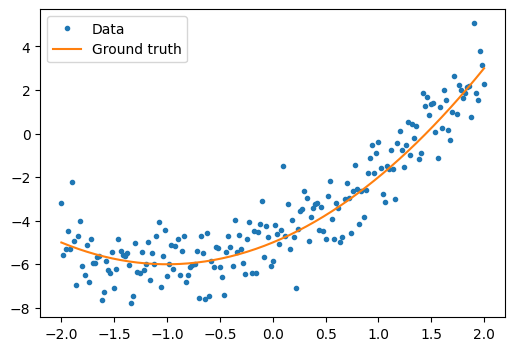

In [42]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [6, 4]

x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label = 'Ground truth')
plt.legend()

In [43]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

quad_model = Model()

First, observe your model's performance before training:

In [44]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

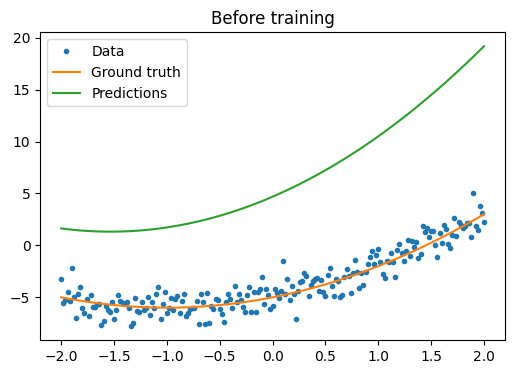

In [45]:
plot_preds(x, y, f, quad_model, 'Before training')

Now, define a loss for your model:

Given that this model is intended to predict continuous values, the mean squared error (MSE) is a good choice for the loss function. Given a vector of predictions, $\hat{y}$, and a vector of true targets, $y$, the MSE is defined as the mean of the squared differences between the predicted values and the ground truth.

$MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i -y_i)^2$

In [46]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 54.921
Mean squared error for step 10: 9.299
Mean squared error for step 20: 3.873
Mean squared error for step 30: 2.028
Mean squared error for step 40: 1.365
Mean squared error for step 50: 1.133
Mean squared error for step 60: 1.045
Mean squared error for step 70: 1.012
Mean squared error for step 80: 1.001
Mean squared error for step 90: 0.997




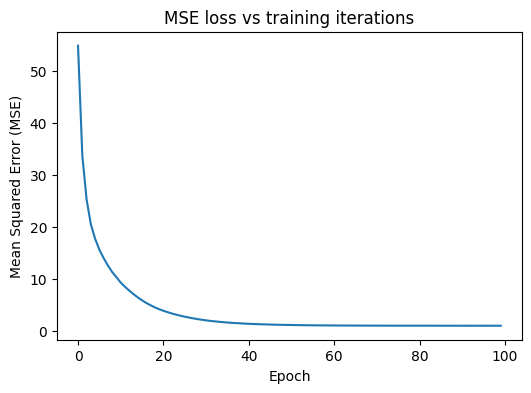

In [47]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

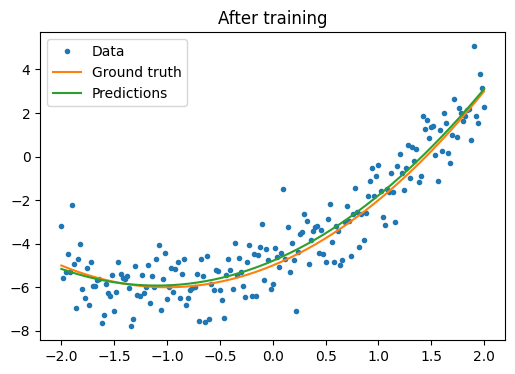

In [48]:
plot_preds(x, y, f, quad_model, 'After training')

Refer to [Basic training loops](basic_training_loops.ipynb) and the [Keras guide](https://www.tensorflow.org/guide/keras) for more details.